In [383]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [384]:
Choices = ['Car', 'Goat1' ,'Goat2']
choice1_cont = ''
choice2_cont = ''
host_choice_var = ''
Outcome = []
Win_switch = []
Win_nonswitch = []
Dist_data = []
win_switch_per = []
win_nonswitch_per = []

In [385]:
# contestant's first choice,randomly picked by the system

def cont_choice():
    random.shuffle(Choices)
    choice1_cont = Choices[0]
    #print(choice1_cont)
    return choice1_cont

In [386]:
# host making a choice - cannot be a car or the contestant's choice

def host_choice(choice_cont):

    for options in Choices:
        if choice1_cont == 'Car':
            goats = ['Goat1', 'Goat2']
            random.shuffle(goats)
            host_choice_var = goats[0]
        else:
            if choice1_cont == 'Goat1':
                host_choice_var = 'Goat2'
            else:
                host_choice_var = 'Goat1'
                
    #print("the Host's choice - {}".format(host_choice_var))
    return host_choice_var


In [387]:
# Contestant takes finall decision

def cont_final_choice():

#inititing list for available options for the contestant after host has made the choice
    cont_final_options = []
    for opt in Choices:
        #appeding choices except the choice of the host
        if host_choice_var != opt:
            cont_final_options.append(opt)
    
    #print("the array is {}".format(cont_final_options))        
    random.shuffle(cont_final_options)
    # picking up randomly the final choice for contestant from the available choices
    choice2_cont = cont_final_options[0]
    
    return choice2_cont


[Text(0, 0.5, 'Frequency of distribution'),
 Text(0.5, 0, 'Excess win probablity when switch'),
 Text(0.5, 1.0, 'Hypothesis testing for Null = P(Switch) is same as P(NonSwitch)')]

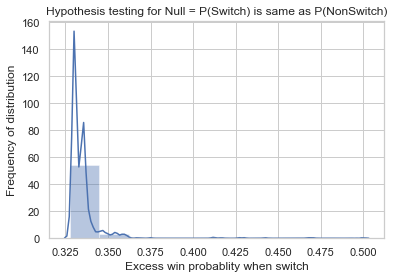

In [388]:
for j in range(0,1000):

    for i in range(0,100):

        #passing contestant choice to host choice function 
        choice1_cont = cont_choice()
        host_choice_var = host_choice(choice1_cont)
        choice2_cont = cont_final_choice()

    # Contestant win when the final choice is car
        if choice2_cont == 'Car':
            # checking if the win happened if there was a switch in the decision - appending True for switch in the Win array
                if choice1_cont != choice2_cont:
                    Win_switch.append(True)

                else:
                    Win_nonswitch.append(True)
 
    win_switch_per.append(Win_switch.count(True)/(Win_switch.count(True)+Win_nonswitch.count(True)))
    win_nonswitch_per.append(Win_nonswitch.count(True)/(Win_switch.count(True)+Win_nonswitch.count(True)))
# Testing Null hyposthesis - Win probability of switch = Win probability of Non Switch Or Win Probability of Switch - non Swtch is Zero    
    Dist_data.append((Win_switch.count(True) - Win_nonswitch.count(True))/(Win_switch.count(True) + Win_nonswitch.count(True)))
#Distribution plot clearly depicts that the win probability o Switch - Non Switch is not zero with very high win
sns.distplot(Dist_data, bins=10).set(xlabel = "Excess win probablity when switch", ylabel = "Frequency of distribution", title = "Hypothesis testing for Null = P(Switch) is same as P(NonSwitch)")




[Text(0, 0.5, 'Winning probablity'),
 Text(0.5, 0, 'Number of sample winning simulations'),
 Text(0.5, 1.0, 'Comparison of Win probablities of Switch Vs Non-Switch')]

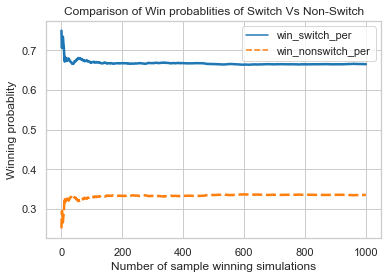

In [389]:
Data = pd.DataFrame({'win_switch_per': win_switch_per,
                     'win_nonswitch_per': win_nonswitch_per},
                    columns = ['win_switch_per', 'win_nonswitch_per'])


sns.set(style="whitegrid")

sns.lineplot(data=Data, palette="tab10", linewidth=2.5).set(xlabel = "Number of sample winning simulations", 
                                                            ylabel = "Winning probablity", title = "Comparison of Win probablities of Switch Vs Non-Switch")


